<a href="https://colab.research.google.com/github/lunaB/AI-Study/blob/master/3_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# XRP 과거데이터
!wget https://www.coingecko.com/price_charts/export/44/mmk.csv

--2020-02-19 09:37:01--  https://www.coingecko.com/price_charts/export/44/mmk.csv
Resolving www.coingecko.com (www.coingecko.com)... 104.20.196.135, 104.20.195.135, 2606:4700:10::6814:c387, ...
Connecting to www.coingecko.com (www.coingecko.com)|104.20.196.135|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: unspecified [text/csv]
Saving to: ‘mmk.csv’

mmk.csv                 [ <=>                ] 174.83K  --.-KB/s    in 0.08s   

2020-02-19 09:37:03 (2.03 MB/s) - ‘mmk.csv’ saved [179029]



In [2]:
import pandas as pd

# 데이터 로드
data = pd.read_csv('mmk.csv')
data.head()

,snapped_at,price,market_cap,total_volume
0,2013-08-04 00:00:00 UTC,NaN,NaN,NaN
1,2013-08-05 00:00:00 UTC,NaN,NaN,NaN
2,2013-08-06 00:00:00 UTC,NaN,NaN,NaN
3,2013-08-07 00:00:00 UTC,NaN,NaN,NaN
4,2013-08-08 00:00:00 UTC,NaN,NaN,NaN


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2386 entries, 0 to 2385
Data columns (total 4 columns):
snapped_at      2386 non-null object
price           2360 non-null float64
market_cap      2292 non-null float64
total_volume    2340 non-null float64
dtypes: float64(3), object(1)
memory usage: 74.7+ KB


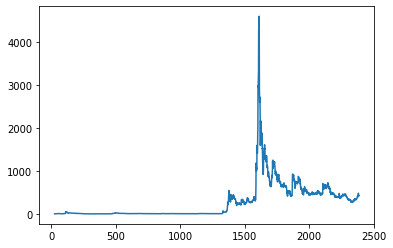

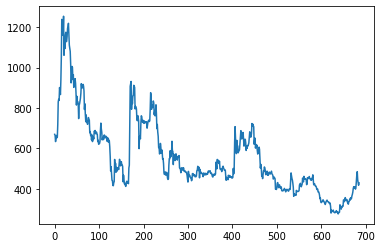

데이터수  686
(656, 1, 30)
[0.71521241 0.7043738  0.71583237 0.71233132 0.68821364 0.67388661
 0.66805594 0.6947426  0.69761564 0.71837192 0.71052212 0.73353237
 0.71979555 0.72630833 0.75310308 0.76796902 0.79117979 0.82746802
 0.84667198 0.83718845 0.83056393 0.84527272 0.821501   0.8401603
 0.90022004 0.96808639 1.         0.9165284  0.88531666 0.86137706
 0.88555089]
[[0.71521241 0.7043738  0.71583237 0.71233132 0.68821364 0.67388661
  0.66805594 0.6947426  0.69761564 0.71837192 0.71052212 0.73353237
  0.71979555 0.72630833 0.75310308 0.76796902 0.79117979 0.82746802
  0.84667198 0.83718845 0.83056393 0.84527272 0.821501   0.8401603
  0.90022004 0.96808639 1.         0.9165284  0.88531666 0.86137706]]
[[0.88555089]]


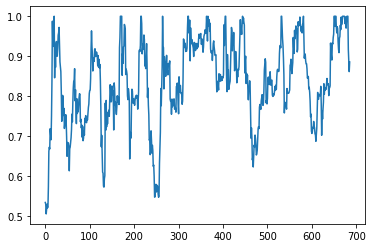

In [4]:
import matplotlib.pyplot as plt
import numpy as np

# 그래프 확인
plt.plot(np.array(data['price']))
plt.show()

# 극단적 데이터 제거
new_data = np.array(data['price'])[1700:]
plt.plot(new_data)
plt.show()

# 데이터
input_size = 30
output_size = 1
print('데이터수 ',len(new_data))

# 학습을 위해 데이터 나누기
train_data = []
target_data = []
# m = np.max(new_data)
for i in range(len(new_data) - input_size):
    # 스케일링
    max_v = max(new_data[i:i+input_size+output_size])
    train_data.append(np.array([new_data[i:i+input_size]]) / max_v)
    target_data.append(np.array([new_data[i+input_size:i+input_size+output_size]]) / max_v)

print(np.array(train_data).shape)

# 일치 확인 (max_v 남아있는값)
print(new_data[-input_size -output_size:] / max_v)
print(train_data[-1])
print(target_data[-1])

train_data = np.array(train_data, dtype=np.float32)
target_data = np.array(target_data, dtype=np.float32)

# input size output size 31개 기준으로 가장높은 나누어 0~1의 값을 만듬
plt.plot(np.concatenate((train_data[0].reshape(-1), target_data.reshape(-1))))
plt.show()

1 ephoch loss : 0.03590543568134308
101 ephoch loss : 0.030240587890148163
201 ephoch loss : 0.015350007452070713
301 ephoch loss : 0.013968654908239841
401 ephoch loss : 0.012725607492029667
501 ephoch loss : 0.011648636311292648
601 ephoch loss : 0.010740725323557854
701 ephoch loss : 0.009989889338612556
801 ephoch loss : 0.009374307468533516
901 ephoch loss : 0.008867609314620495
1001 ephoch loss : 0.008443749509751797


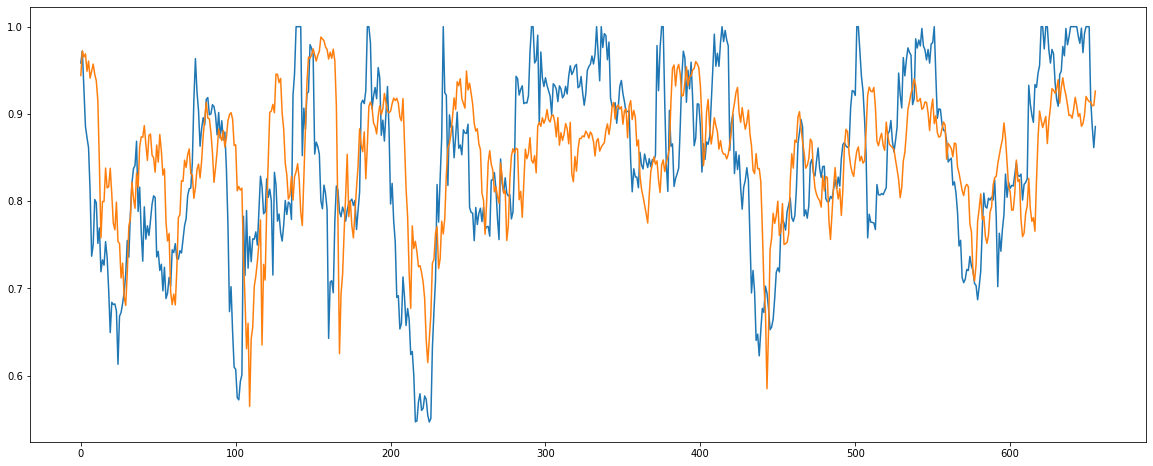

In [6]:
import torch
import torch.nn as nn

rnn = torch.nn.RNN(input_size=input_size, hidden_size=1)

loss_func = nn.MSELoss()
optm = torch.optim.Adam(rnn.parameters(), lr=0.0005)

for i in range(1000+1):

    input_tensor = torch.FloatTensor(train_data)
    target_tensor = torch.FloatTensor(target_data)

    # print(input_tensor.size())
    # print(target_tensor.size())

    output, hidden = rnn(input_tensor)

    # print(output.size())
    loss = loss_func(output, target_tensor)

    optm.zero_grad()
    loss.backward()
    optm.step()

    if i%100 == 0:
        print(i+1, 'ephoch loss :', loss.item())

plt.rcParams["figure.figsize"] = (20,8)
plt.plot(target_data.reshape(-1))
plt.plot(output.view(-1).tolist())
plt.show()